<a href="https://colab.research.google.com/github/Natsumi-zemi/zemi3/blob/master/%E7%94%BB%E5%83%8F%E5%88%A4%E5%88%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 画像判別


In [ ]:
# ライブラリのインストール
!pip install icrawler

In [ ]:

# 画像を保存するフォルダに移動
# pathは適宜変える
%cd drive/My Drive/gazobunrui/original data
!pwd

/content/drive/My Drive/original data
/content/drive/My Drive/original data


## 画像取得

In [ ]:

# こんな感じで書く。枚数は、max_numで指定する。
# from icrawler.builtin import BingImageCrawler
# crawler = BingImageCrawler(storage={"root_dir": "ここと"})
# crawler.crawl(keyword="ここを変えるt", max_num=20)

from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "Yoshizawa Ryo"})
crawler.crawl(keyword="吉沢亮t", max_num=20)

from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "Takasugi"})
crawler.crawl(keyword="高杉真宙", max_num=20)

from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "Yamada Ryosuke"})
crawler.crawl(keyword="山田涼介", max_num=20)

## 水増し

In [ ]:
%matplotlib inline


import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
from keras.preprocessing.image import array_to_img,img_to_array,load_img
import numpy as np
import os


X_train=[]
Y_train=[]

X_test=[]
Y_test=[]

Mydribe = "/content/drive/My Drive/colab data"

l=os.listdir(Mydribe + "/original data")

In [ ]:
cascade_path="/content/drive/My Drive/haarcascade_frontalface_alt.xml"


Yoshizawa Ryo
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000002.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000003.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000004.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000005.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000006.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000007.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000008.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000009.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000010.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000011.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000012.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000013.jpg
/content/drive/My Drive/colab data/original data/Yoshizawa Ryo/000014.jpg
/content/drive/My Drive

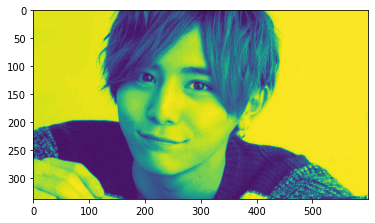

In [ ]:
for i in l:
    result_dir=i.split(".")[0]
    print(result_dir)
    # os.mkdir(Mydribe + "/face/"+result_dir)
    os.makedirs(Mydribe + "/face/"+result_dir, exist_ok=True)

    m=os.listdir(Mydribe + "/original data/"+i)
    n=0
    for target_file in m:
        origin_image=(Mydribe + "/original data/"+i+"/"+target_file)
        print(origin_image)
        cascade=cv2.CascadeClassifier(cascade_path)
        image=cv2.imread(origin_image)

        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        plt.imshow(gray)

        facerect=cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=1,minSize=(10,10))

        for x,y,w,h in facerect:
            face=gray[y:y+h,x:x+w]
            face=cv2.resize(face,(128,128))
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.flip(face,1)
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.blur(face,(10,10))
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.blur(cv2.flip(face,1),(10,10))
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1